In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

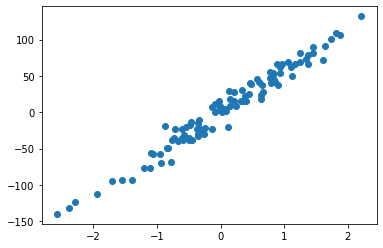

In [4]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

In [8]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [14]:
# matrice x
X = np.hstack((x, np.ones(x.shape)))
X.shape
X

array([[ 0.06725874,  1.        ],
       [-0.73708615,  1.        ],
       [ 0.31433121,  1.        ],
       [ 0.97149864,  1.        ],
       [ 0.60349931,  1.        ],
       [ 1.45976324,  1.        ],
       [ 1.45620783,  1.        ],
       [ 0.13133477,  1.        ],
       [ 0.47058016,  1.        ],
       [ 0.93174072,  1.        ],
       [ 1.61093199,  1.        ],
       [-0.94418325,  1.        ],
       [-0.34742942,  1.        ],
       [ 0.33631206,  1.        ],
       [ 0.45111245,  1.        ],
       [-0.48483305,  1.        ],
       [-1.06835606,  1.        ],
       [ 1.63659296,  1.        ],
       [-0.45769364,  1.        ],
       [-0.83999721,  1.        ],
       [-0.01248996,  1.        ],
       [-1.54400213,  1.        ],
       [-1.20175599,  1.        ],
       [-1.38841526,  1.        ],
       [ 0.37300982,  1.        ],
       [ 0.08030373,  1.        ],
       [ 0.84819332,  1.        ],
       [-0.87186364,  1.        ],
       [ 0.40242821,

In [16]:
theta = np.random.randn(2, 1)
theta.shape
theta

array([[0.30375677],
       [0.11044691]])

In [17]:
#Modèle

In [18]:
def model(X, theta):
    return X.dot(theta)

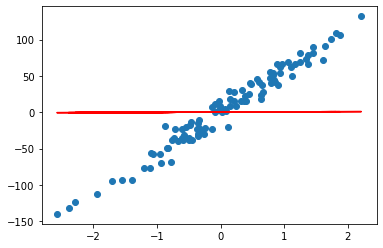

In [22]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')


In [23]:
#Fonction cout = l'erreur quadratique moyenne

In [25]:
def cost_function(X, y, theta) :
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [26]:
cost_function(X, y, theta)

1574.7176711988513

In [27]:
# 4.Gradient et descente de gradient

In [28]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [51]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [52]:
# 5. Entrainement du modèle
# Machine Learning

In [53]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [54]:
theta_final

array([[56.86565033],
       [ 0.40939484]])

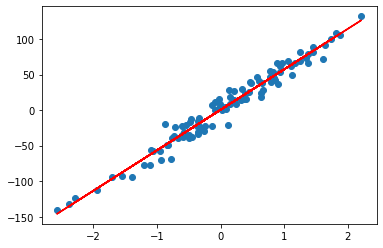

In [55]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

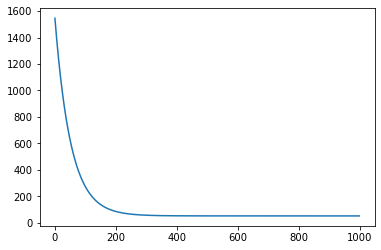

In [56]:
plt.plot(range(1000), cost_history)

In [57]:
# 7. Le coéfficient de détermination => R²

In [58]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [59]:
coef_determination(y, predictions)

0.9669238962870712